In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from pathlib import Path

import matplotlib.pyplot as plt
from sladsnet.code.base import Sample
from sladsnet.code.erd import SladsSklearnModel
from sladsnet.code.measurement_interface import TransmissionSimulationMeasurementInterface
from sladsnet.code.results import Result
from sladsnet.code.sampling import run_sampling
from sladsnet.input_params import ERDInputParams, GeneralInputParams, SampleParams
from skimage.metrics import structural_similarity, mean_squared_error

In [3]:
base_path = Path.cwd().parent

In [4]:
train_path = base_path / 'ResultsAndData/TrainingData/93/'

# With c value 2

In [24]:
c_value = 2

In [25]:
params_erd = ERDInputParams(c_value=c_value)
params_gen = GeneralInputParams()

In [26]:
erd_model = SladsSklearnModel(load_path=train_path / f'c_{c_value}/erd_model_relu.pkl')

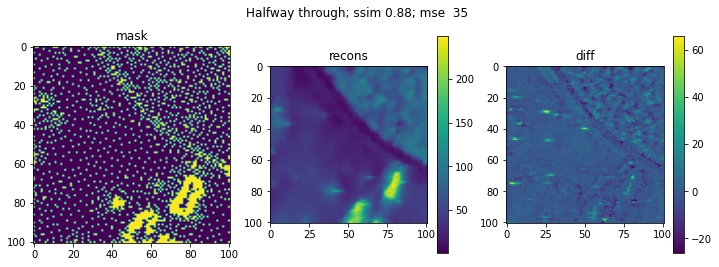

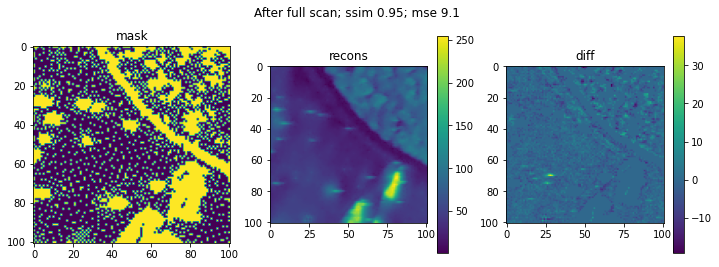

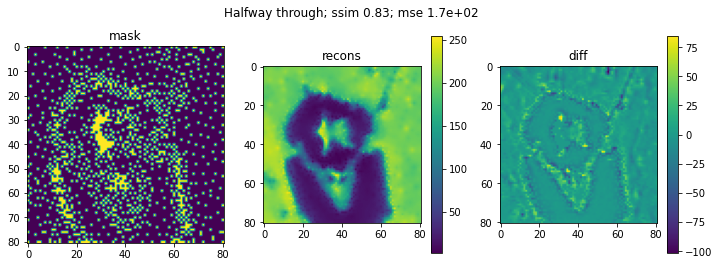

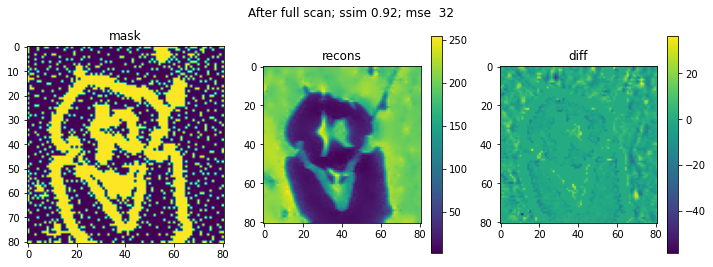

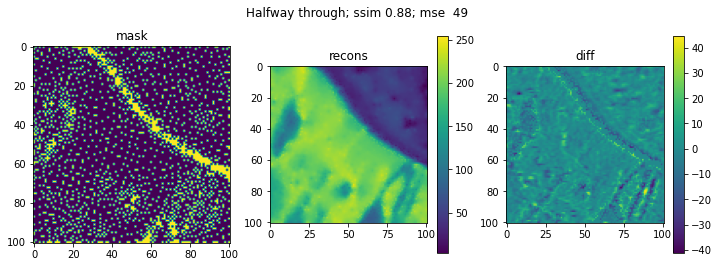

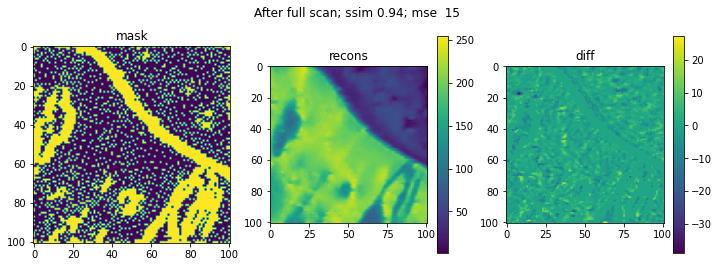

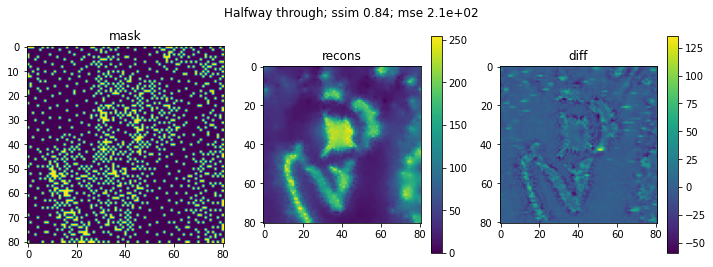

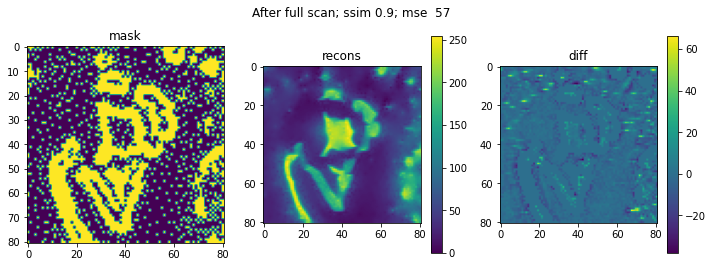

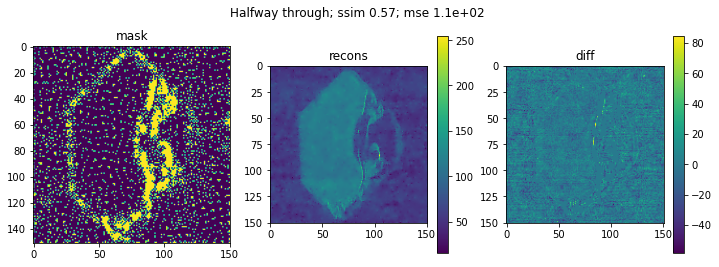

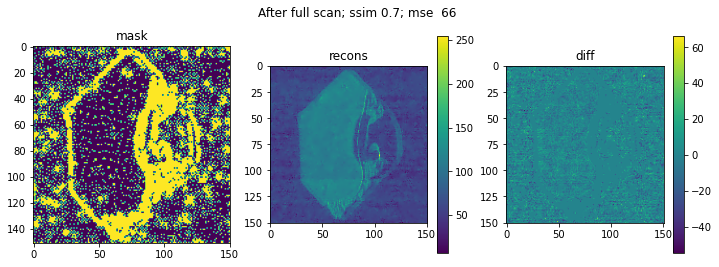

In [27]:
for img_num in [84, 91, 93, 95, 199]:
    img_path = base_path / f'ResultsAndData/TestingImages/TestingImageSet_{img_num}'
    tif_path = list(img_path.glob('*.tif'))[0]

    measurement_interface = TransmissionSimulationMeasurementInterface(image_path=tif_path)
    results = Result()
    sample_params = SampleParams(image_shape=measurement_interface.image.shape,
                                 stop_ratio=0.4)
    sample = Sample(sample_params=sample_params,
                    general_params=params_gen,
                    erd_params=params_erd,
                    measurement_interface=measurement_interface,
                    erd_model=erd_model)
    run_sampling(sample, results=results, results_frequency_percentage=1, disable_progress_bar=False)

    save_path = base_path / f'ResultsAndData/SladsResults/cameraman_to_{img_num}'
    save_path.mkdir(exist_ok=True)
    results.save(save_path / 'results.pkl')

    num_results = results.size

    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1, 3, 1)
    plt.imshow(results.outputs.masks[num_results // 2])
    plt.title('mask')
    plt.subplot(1, 3, 2)
    plt.imshow(results.outputs.recons[num_results // 2])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1, 3, 3)
    plt.imshow(measurement_interface.image - results.outputs.recons[num_results // 2])
    plt.colorbar()
    plt.title('diff')
    ssim = structural_similarity(results.outputs.recons[num_results // 2], measurement_interface.image, 
                             data_range=255)
    mse = mean_squared_error(results.outputs.recons[num_results // 2], measurement_interface.image)
    plt.suptitle(f'Halfway through; ssim {ssim:3.2g}; mse {mse:3.2g}')
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1, 3, 1)
    plt.imshow(results.outputs.masks[-1])
    plt.title('mask')
    plt.subplot(1, 3, 2)
    plt.imshow(results.outputs.recons[-1])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1, 3, 3)
    plt.imshow(measurement_interface.image - results.outputs.recons[-1])
    plt.colorbar()
    plt.title('diff')    
    ssim = structural_similarity(results.outputs.recons[-1], measurement_interface.image, 
                             data_range=255)
    mse = mean_squared_error(results.outputs.recons[-1], measurement_interface.image)
    plt.suptitle(f'After full scan; ssim {ssim:3.2g}; mse {mse:3.2g}')
    plt.show()





# With c value 16

In [28]:
c_value = 16

In [29]:
params_erd = ERDInputParams(c_value=c_value)
params_gen = GeneralInputParams()

In [30]:
erd_model = SladsSklearnModel(load_path=train_path / f'c_{c_value}/erd_model_relu.pkl')

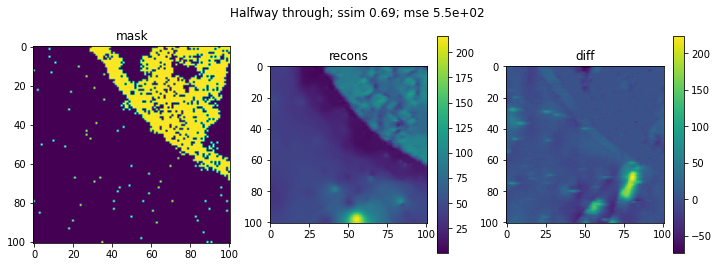

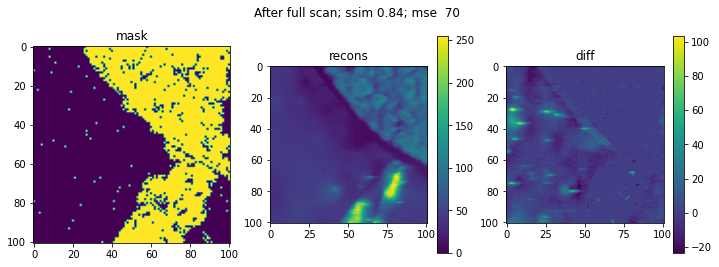

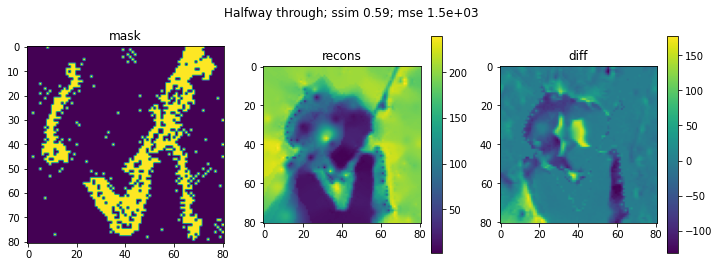

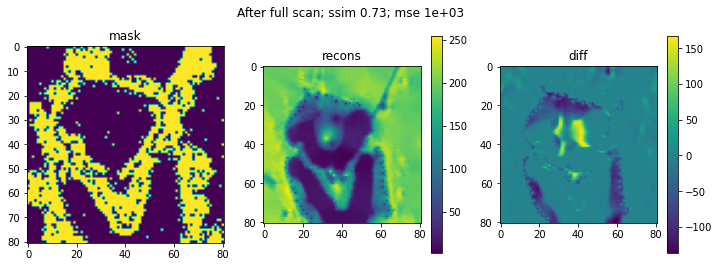

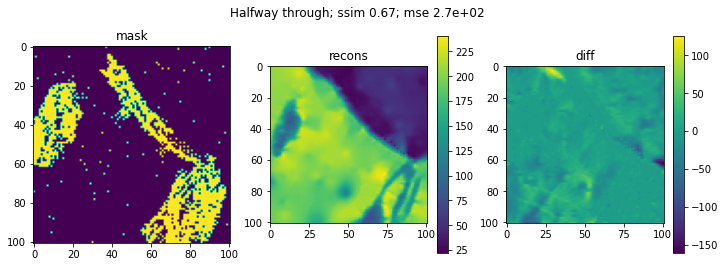

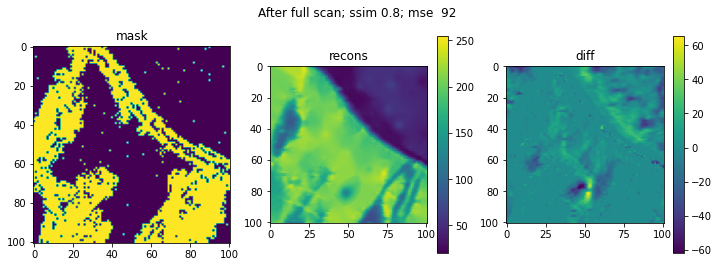

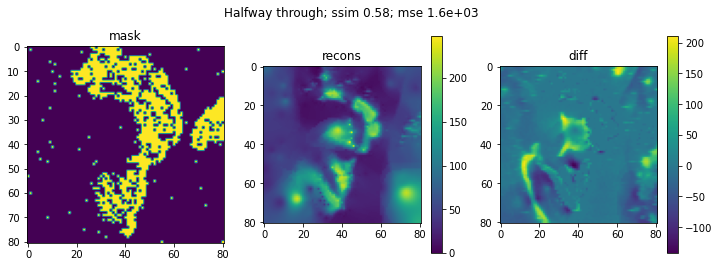

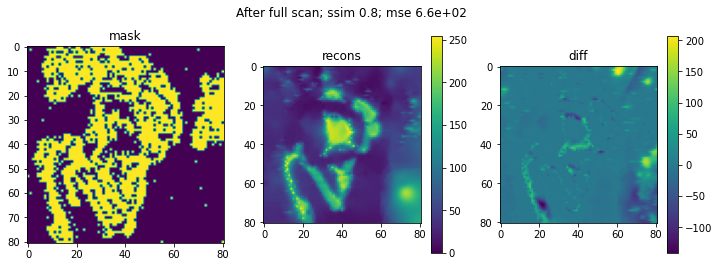

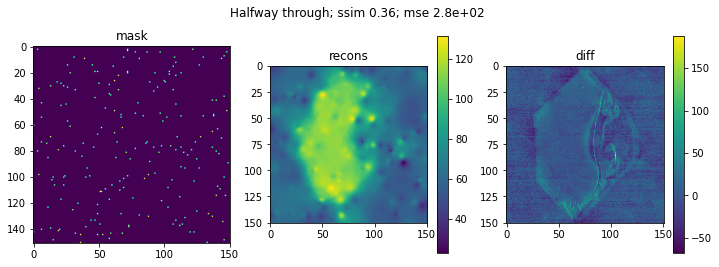

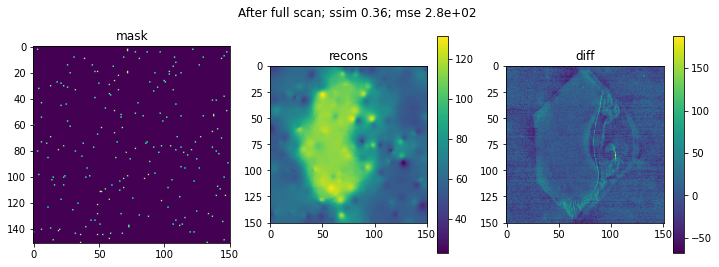

In [32]:
for img_num in [84, 91, 93, 95, 199]:
    img_path = base_path / f'ResultsAndData/TestingImages/TestingImageSet_{img_num}'
    tif_path = list(img_path.glob('*.tif'))[0]

    measurement_interface = TransmissionSimulationMeasurementInterface(image_path=tif_path)
    results = Result()
    sample_params = SampleParams(image_shape=measurement_interface.image.shape,
                                 stop_ratio=0.4)
    sample = Sample(sample_params=sample_params,
                    general_params=params_gen,
                    erd_params=params_erd,
                    measurement_interface=measurement_interface,
                    erd_model=erd_model)
    run_sampling(sample, results=results, results_frequency_percentage=1, disable_progress_bar=False)

    save_path = base_path / f'ResultsAndData/SladsResults/cameraman_to_{img_num}'
    save_path.mkdir(exist_ok=True)
    results.save(save_path / 'results.pkl')

    num_results = results.size

    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1, 3, 1)
    plt.imshow(results.outputs.masks[num_results // 2])
    plt.title('mask')
    plt.subplot(1, 3, 2)
    plt.imshow(results.outputs.recons[num_results // 2])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1, 3, 3)
    plt.imshow(measurement_interface.image - results.outputs.recons[num_results // 2])
    plt.colorbar()
    plt.title('diff')
    ssim = structural_similarity(results.outputs.recons[num_results // 2], measurement_interface.image, 
                             data_range=255)
    mse = mean_squared_error(results.outputs.recons[num_results // 2], measurement_interface.image)
    plt.suptitle(f'Halfway through; ssim {ssim:3.2g}; mse {mse:3.2g}')
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1, 3, 1)
    plt.imshow(results.outputs.masks[-1])
    plt.title('mask')
    plt.subplot(1, 3, 2)
    plt.imshow(results.outputs.recons[-1])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1, 3, 3)
    plt.imshow(measurement_interface.image - results.outputs.recons[-1])
    plt.colorbar()
    plt.title('diff')    
    ssim = structural_similarity(results.outputs.recons[-1], measurement_interface.image, 
                             data_range=255)
    mse = mean_squared_error(results.outputs.recons[-1], measurement_interface.image)
    plt.suptitle(f'After full scan; ssim {ssim:3.2g}; mse {mse:3.2g}')
    plt.show()


